# Перевод текстов с Transformers и Keras

Рассмотрим процесс создания и обучения модели `Transformer -to-sequence` для перевода с испанского на английский . `Transformer был первоначально предложен в статье [«Attention is all you need» Vaswani et al. (2017)].(https://arxiv.org/abs/1706.03762)

Трансформеры — это глубокие нейронные сети, которые заменяют CNN и RNN на механизм [внутреннего внимания](https://developers.google.com/machine-learning/glossary?hl=ru#self-attention). Внутреннее внимание позволяет Трансформерам легко передавать информацию через входные последовательности.

Основная идея модели Transformer — это самовнимание — способность обращать внимание на различные позиции входной последовательности для вычисления представления этой последовательности. Трансформер создает стопки слоев собственного внимания.

Нейронные сети для машинного перевода обычно содержат кодер, считывающий входное предложение и генерирующий его представление. Затем декодер генерирует выходное предложение слово за словом, сверяясь с представлением, сгенерированным кодером. Трансформер начинает с создания начальных представлений, или вложений (embeddig), для каждого слова. Затем, используя внутреннее внимание, он объединяет информацию из всех остальных слов, генерируя новое представление для каждого слова, основанное на всем контексте, представленном на рисенке заполненными шариками. Затем этот шаг повторяется несколько раз параллельно для всех слов, последовательно генерируя новые представления.



## 1.2. Компоненты Transformer



![picture](https://github.com/arminnorouzi/machine_learning_course_UofA_MECE610/blob/main/L07_Generative_AI/figures/transformers.png?raw=true) Source: [1-2]

На этом рисунке схематично показана архитектура transformers. Архитектура Transformer состоит из кодера и декодера, которые состоят из нескольких уровней, использующих механизмы внимания и саморегуляции для обработки входных и выходных последовательностей. Для кодирования положения токенов во входной последовательности используется технология позиционного кодирования. Эти компоненты работают вместе, позволяя transformers достигать самых современных результатов в различных задачах обработки естественного языка.


- **Encoder:** Encoder - это часть архитектуры Transformer, которая обрабатывает входную последовательность и создает скрытое представление последовательности. Входная последовательность сначала преобразуется в последовательность вложений, которые затем передаются в стопку идентичных слоев. Каждый уровень в стеке кодировщика состоит из двух подуровней: уровня самообучения и уровня прямой связи. Уровень самообучения позволяет кодировщику отслеживать различные части входной последовательности и фиксировать долгосрочные зависимости, в то время как уровень прямой связи применяет нелинейное преобразование к скрытому представлению.

- **Decoder:** Decoder - это часть архитектуры Transformer, которая генерирует выходную последовательность на основе скрытого представления, создаваемого кодером. Как и кодировщик, декодер также состоит из набора идентичных слоев, но каждый слой имеет три подслоя: слой самовнимания, слой внимания кодировщика-декодера и слой прямой связи. Уровень самовнимания позволяет декодеру обрабатывать различные части выходной последовательности, в то время как уровень внимания кодер-декодер позволяет декодеру обрабатывать различные части входной последовательности.

- **Attention:** Attention - это механизм в нейронных сетях, который позволяет модели выборочно обрабатывать различные части входных данных при составлении прогноза. В архитектуре Transformer внимание используется как в кодере, так и в декодере. Механизм attention вычисляет взвешенную сумму значений входной последовательности, где веса определяются сходством между запросом и ключами. Механизм attention позволяет модели фокусироваться на различных частях входной последовательности в зависимости от выполняемой задачи.

- **Self-Attention Mechanism:** Self-attention - это особый тип механизма внимания, который используется в архитектуре Transformer. В self-attention входная последовательность преобразуется в последовательность векторов запросов, ключей и значений. Векторы запросов используются для вычисления весов внимания для каждой позиции во входной последовательности на основе сходства между вектором запроса и ключевыми векторами. Затем векторы значений взвешиваются по весам внимания и суммируются для получения взвешенного представления входной последовательности. Это взвешенное представление затем используется в качестве входных данных для следующего уровня модели. Самонаблюдение позволяет модели отслеживать различные части входной последовательности и фиксировать долгосрочные зависимости.

- **Positional Encoding:** Позиционное кодирование - это метод, используемый в архитектуре Transformer для кодирования положения токенов во входной последовательности. Поскольку преобразователь не имеет рекуррентной или сверточной структуры, которая могла бы фиксировать порядок входной последовательности, позиционное кодирование добавляется к встраиванию каждого токена, чтобы предоставить модели информацию о положении токена в последовательности. Позиционное кодирование вычисляется с использованием фиксированной функции, которая учитывает положение токена в последовательности и размер встраивания. Затем результат добавляется к встроенному токену, позволяя модели различать токены, которые появляются в разных позициях во входной последовательности.


Чтобы узнать, как эти компоненты работают в общей картине, изучите материалы [Google AI Blog post](https://ai.googleblog.com/2017/08/transformer-novel-neural-network.html):

> Нейронные сети для машинного перевода обычно содержат кодер, считывающий входное предложение и генерирующий его представление. Затем декодер генерирует выходное предложение слово за словом, сверяясь с представлением, сгенерированным кодером. Transformer начинает с создания начальных представлений, или вложений, для каждого слова. Затем, используя самонаблюдение, он объединяет информацию из всех остальных слов, генерируя новое представление для каждого слова, основанное на всем контексте, представленном заполненными шариками на рисунке ниже. Затем этот шаг повторяется несколько раз параллельно для всех слов, последовательно генерируя новые представления.

<img src="https://www.tensorflow.org/images/tutorials/transformer/apply_the_transformer_to_machine_translation.gif" alt="Applying the Transformer to machine translation">

Применение трансформера к машинному переводу. Источник: [Google AI Blog](https://ai.googleblog.com/2017/08/transformer-novel-neural-network.html).


# 2. Реализация трансформера в Tensorflow
## 2.1. Настройка среды и подготовка обучающих данных

Импортируем необходимые библиотеки для создания и обучения модели-трансформера

In [ ]:
!pip install -q -U tensorflow-text tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 2.5 MB/s eta 0:00:00


In [ ]:
import logging
import time

import numpy as np
import matplotlib.pyplot as plt

import tensorflow_datasets as tfds
import tensorflow as tf

import tensorflow_text

Загрузим набор данных TED Talks для [перевода с португальского на английский с использованием наборов данных TensorFlow (TFDS)](https://www.tensorflow.org/datasets/catalog/ted_hrlr_translate#ted_hrlr_translatept_to_en):

Для загрузки набора данных используется функция `tfds.load()`.
Функции передаются следующие аргументы:

- `ted_hrlr_translate/pt_to_en` - имя загружаемого набора данных, который представляет собой набор данных TED Talks для перевода с португальского на английский.
- `with_info=True:` - дополнительные метаданные о наборе данных должны быть возвращены вместе с самим набором данных.
- `as_supervised=True:` - набор данных должен быть возвращен в виде набора пар `(input, target)`, где `input` - это предложение на португальском языке, а `target` - соответствующий перевод на английский.

In [ ]:
examples, metadata = tfds.load('ted_hrlr_translate/pt_to_en',
                               with_info=True,
                               as_supervised=True)

train_examples, val_examples = examples['train'], examples['validation']

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/51785 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/ted_hrlr_translate/pt_to_en/incomplete.W8PR1K_1.0.0/ted_hrlr_translate-tra…

Generating validation examples...:   0%|          | 0/1193 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/ted_hrlr_translate/pt_to_en/incomplete.W8PR1K_1.0.0/ted_hrlr_translate-val…

Generating test examples...:   0%|          | 0/1803 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/ted_hrlr_translate/pt_to_en/incomplete.W8PR1K_1.0.0/ted_hrlr_translate-tes…

Dataset ted_hrlr_translate downloaded and prepared to /root/tensorflow_datasets/ted_hrlr_translate/pt_to_en/1.0.0. Subsequent calls will reuse this data.


Давайте распечатаем первую порцию примеров из набора данных для перевода с португальского на английский, загруженного с помощью `TensorFlow Datasets (TFDS)`.

Вызов функции `train_examples.batch(3).take(1)` разбивает набор данных на группы по три примера и затем принимает первый мини-батч. Это означает, что код распечатает первые три примера из набора данных.

Затем код перебирает примеры в пакете и распечатывает каждый пример как на португальском, так и на английском языках. Вызов функции `.decode('utf-8')` используется для преобразования байтовых строк в наборе данных в удобочитаемый текст.

In [ ]:
for pt_examples, en_examples in train_examples.batch(3).take(1):
  print('Примеры на португальском:')
  for pt in pt_examples.numpy():
    print(pt.decode('utf-8'))
  print()

  print('Примеры на английском:')
  for en in en_examples.numpy():
    print(en.decode('utf-8'))

Примеры на португальском:
e quando melhoramos a procura , tiramos a única vantagem da impressão , que é a serendipidade .
mas e se estes fatores fossem ativos ?
mas eles não tinham a curiosidade de me testar .

Примеры на английском:
and when you improve searchability , you actually take away the one advantage of print , which is serendipity .
but what if it were active ?
but they did n't test for curiosity .


## 2.2. Настройка токенизатора

Выполним разметку текста.

Загрузим токенизаторы, используемые для модели перевода с португальского на английский, предоставленной `TensorFlow`.

Воспользуемся руководством с веб-сайта [tensorflow website](https://www.tensorflow.org/text/tutorials/transformer) и используем токенизаторы, встроенные в руководство [subword tokenizer](https://www.tensorflow.org/text/guide/subwords_tokenizer). В этом руководстве оптимизированы два объекта `text.BertTokenizer` (один для английского, другой для португальского) для ** этого набора данных ** и экспортированы в формат `TensorFlow` `saved_model`.

Функция `tf.keras.utils.get_file()` используется для загрузки архивированной версии токенизаторов с веб-сайта `TensorFlow`. Первый аргумент указывает имя загружаемого файла, второй аргумент указывает URL-адрес, с которого можно загрузить файл. Аргумент `cache_dir` указывает каталог, в котором должен быть кэширован загруженный файл, `cache_subdir` указывает подкаталог, в котором должен храниться файл. Аргумент `extract` указывает, следует ли извлекать содержимое загруженного zip-файла.



In [ ]:
model_name = 'ted_hrlr_translate_pt_en_converter'
tf.keras.utils.get_file(
    f'{model_name}.zip',
    f'https://storage.googleapis.com/download.tensorflow.org/models/{model_name}.zip',
    cache_dir='.', cache_subdir='', extract=True
)

184801/184801 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


'./ted_hrlr_translate_pt_en_converter.zip'

Теперь можно использовать функцию `tf.saved_model.load()` для загрузки токенизаторов из сохраненной модели. Аргумент `model_name` указывает имя сохраненной модели для загрузки, которым в данном случае является `the_hrlr_translate_pt_en_converter`.

In [ ]:
tokenizers = tf.saved_model.load(model_name)

Функция `tokenize` используется для преобразования группы строк в набор идентификаторов токенов с дополнением. Перед токенизацией функция разбивает знаки препинания, преобразует все буквы в нижний регистр и нормализует ввод в формате `Unicode`. Так как входные данные уже стандартизированы, эти шаги не видны в коде. Рассмотрим пример до и после токенизации.

In [ ]:
print('Это набор строк:')
for en in en_examples.numpy():
  print(en.decode('utf-8'))

Это набор строк:
and when you improve searchability , you actually take away the one advantage of print , which is serendipity .
but what if it were active ?
but they did n't test for curiosity .


In [ ]:

encoded = tokenizers.en.tokenize(en_examples)

print('Это набор дополненных идентификаторов токенов (IDs):')
for row in encoded.to_list():
  print(row)

Это набор дополненных идентификаторов токенов (IDs):
[2, 72, 117, 79, 1259, 1491, 2362, 13, 79, 150, 184, 311, 71, 103, 2308, 74, 2679, 13, 148, 80, 55, 4840, 1434, 2423, 540, 15, 3]
[2, 87, 90, 107, 76, 129, 1852, 30, 3]
[2, 87, 83, 149, 50, 9, 56, 664, 85, 2512, 15, 3]


Метод `detokenize` пытается преобразовать идентификаторы токенов в текст, который может быть легко прочитан и понят человеком.

In [ ]:
round_trip = tokenizers.en.detokenize(encoded)

print('Это удобочитаемый текст:')
for line in round_trip.numpy():
  print(line.decode('utf-8'))

Это удобочитаемый текст:
and when you improve searchability , you actually take away the one advantage of print , which is serendipity .
but what if it were active ?
but they did n ' t test for curiosity .


Метод `lookup` преобразует идентификаторы токенов в текст токена:


In [ ]:
print('Это текст, разбитый на токены:')
tokens = tokenizers.en.lookup(encoded)
tokens

Это текст, разбитый на токены:


<tf.RaggedTensor [[b'[START]', b'and', b'when', b'you', b'improve', b'search', b'##ability',
  b',', b'you', b'actually', b'take', b'away', b'the', b'one', b'advantage',
  b'of', b'print', b',', b'which', b'is', b's', b'##ere', b'##nd', b'##ip',
  b'##ity', b'.', b'[END]']                                                 ,
 [b'[START]', b'but', b'what', b'if', b'it', b'were', b'active', b'?',
  b'[END]']                                                           ,
 [b'[START]', b'but', b'they', b'did', b'n', b"'", b't', b'test', b'for',
  b'curiosity', b'.', b'[END]']                                          ]>

Построим график распределения длин токенов.

Сначала для хранения длин токенов создается пустой список под названием `lengths`. Затем для каждой партии из 1024 примеров в обучающем наборе мы можем использовать функции `tokenizers.pt.tokenize()` и `tokenizers.en.tokenize()` для токенизации португальского и английского примеров соответственно. Затем функция `row_lengths()` используется для вычисления количества токенов в каждой строке токенизированных данных, и результирующие длины добавляются в список длин.

После обработки всех батчей функция `np.concatenate()` используется для объединения всех длин токенов в один массив `numpy`, называемый `all_lengths`. Затем этот массив используется для создания гистограммы длин токенов с помощью функции `plt.hist()`.

In [ ]:
lengths = []

for pt_examples, en_examples in train_examples.batch(1024):
  pt_tokens = tokenizers.pt.tokenize(pt_examples)
  lengths.append(pt_tokens.row_lengths())

  en_tokens = tokenizers.en.tokenize(en_examples)
  lengths.append(en_tokens.row_lengths())
  print('.', end='', flush=True)

all_lengths = np.concatenate(lengths)


...................................................

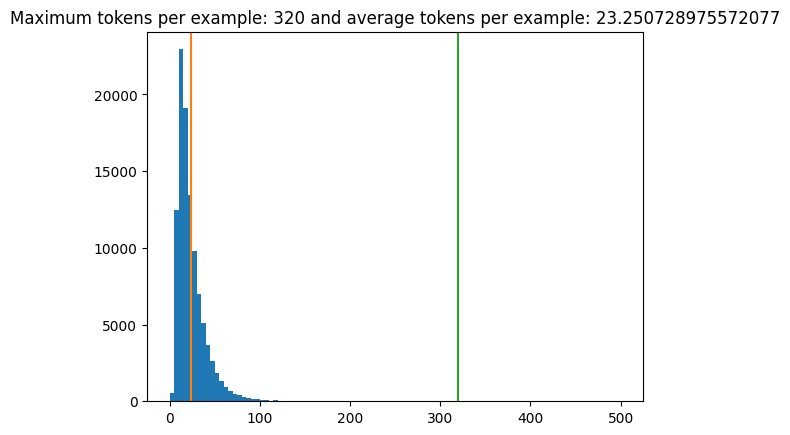

In [ ]:
plt.hist(all_lengths, np.linspace(0, 500, 101))
plt.ylim(plt.ylim())
avg_length = all_lengths.mean()
plt.plot([avg_length, avg_length], plt.ylim())
max_length = max(all_lengths)
plt.plot([max_length, max_length], plt.ylim())
plt.title(f'Maximum tokens per example: {max_length} and average tokens per example: {avg_length}');

## 2.3. Настройка конвейера передачи данных

Напишем функцию `prepare_batch()`, которая подготавливает серию примеров для обучения модели машинного перевода. Входными данными для функции являются предложения на португальском и английском языках, а выходными данными - кортеж из двух тензоров, представляющих входную и выходную последовательности для модели.

Сначала предложения на португальском языке преобразуются в токены с помощью метода `tokenizers.pt.tokenize()`, который возвращает неравномерный тензор, представляющий преобразованные предложения. Затем код обрезает тензор до максимальной длины `MAX_TOKENS`, используя синтаксис `pt[:, :MAX_TOKENS]`, который выбирает первые токены `MAX_TOKENS` из каждого предложения. Результирующий тензор преобразуется в плотный тензор с нулевым заполнением с помощью метода `pt.to_tensor()`.

Английские предложения выделяются и обрезаются аналогичным образом, но с дополнительным шагом. Синтаксис `en[:, :(MAX_TOKENS+1)]` выбирает первые токены `MAX_TOKENS+1` из каждого предложения, которое включает в себя начальный токен `[START]` и конечный токен `[END]`. Тензор `en_inputs` создается путем выбора всех токенов, кроме последнего, в каждом предложении, при этом конечный токен отбрасывается. Тензор `en_labels` создается путем выбора всех токенов, кроме первого, в каждом предложении, при этом начальный токен отбрасывается.

Функция возвращает кортеж из двух тензоров `pt, en_inputs` и `en_labels`, которые представляют входную и выходную последовательности для модели машинного перевода. Эти тензоры могут быть использованы для обучения модели с использованием таких методов, как принуждение преподавателя, когда модель обучается предсказывать следующий токен в выходной последовательности, учитывая входную последовательность и последовательность вывода достоверности до этого момента.

In [ ]:
MAX_TOKENS=128
def prepare_batch(pt, en):
    """
    Предварительная обработка батчей португальских и английских предложений для обучения модели машинного перевода.

    Аргументы:
        pt: Тензор португальских предложений размерности (batch_size,) и тип tf.string.
        en: Тензор английских предложений размерности (batch_size,) и тип tf.string.

    Выход:
        Набор из двух тензоров, представляющих входную и выходную последовательности для модели, и тензор размерности
        (batch_size, max_length) представления основных выходных последовательностей истинности. Тензор входной последовательности имеет
        размерность (batch_size, max_length) и тип tf.int64, и тензор выходной последовательности имеет размерность (batch_size, max_length)
        и тип tf.int64.
    """
    pt = tokenizers.pt.tokenize(pt)      # Выходные данные.
    pt = pt[:, :MAX_TOKENS]    # Обрезать до MAX_TOKENS.
    pt = pt.to_tensor()  # Преобразовать в 0-padded dense Tensor

    en = tokenizers.en.tokenize(en)
    en = en[:, :(MAX_TOKENS+1)]
    en_inputs = en[:, :-1].to_tensor()  # Отбросим токены [END]
    en_labels = en[:, 1:].to_tensor()   # Отбросим токены [START]

    return (pt, en_inputs), en_labels

Теперь преобразуем набор данных в батчи, готовые к вводу в модель.

Следующая функция перетасовывает примеры в наборе данных и разбивает их на батчи размером `BATCH_SIZE`. Затем к каждому батчу применяется функция `prepare_batch`, которая маркирует текст и подготавливает входные и выходные последовательности для модели. Далее выполняется предварительная выборка батчей для повышения производительности во время обучения. Параметр `BUFFER_SIZE` определяет количество примеров, загружаемых в память для перетасовки. Параметр `tf.data.AUTOTUNE` позволяет `TensorFlow` автоматически настраивать входной pipeline для достижения оптимальной производительности.



In [ ]:
BUFFER_SIZE = 20000
BATCH_SIZE = 64

In [ ]:
def make_batches(ds):
  """
  Эта функция берет набор данных TensorFlow "ds" и обрабатывает его в батчи, готовые к отправке в модель.

  Параметры:
  ds (tf.data.Dataset): Набор данных TensorFlow для пакетной обработки

  выход:
  tf.data.Dataset: Обработанный и пакетный набор данных TensorFlow

  """
  return (
      ds
      .shuffle(BUFFER_SIZE)
      .batch(BATCH_SIZE)
      .map(prepare_batch, tf.data.AUTOTUNE)
      .prefetch(buffer_size=tf.data.AUTOTUNE))

Протестируем функцию `make_batches`

In [ ]:
# Создадим батчи для обучающих и валидационных наборов данных
train_batches = make_batches(train_examples)
val_batches = make_batches(val_examples)

for (pt, en), en_labels in train_batches.take(1):
  break

print(f'pt.shape: {pt.shape}')
print(f'en_labels.shape: {en_labels.shape}')

pt.shape: (64, 79)
en_labels.shape: (64, 86)


Функция `make_batches` подготавливает объекты `tf.data.Dataset` для обучения модели `Keras`. Ожидается, что модель будет принимать входные данные в виде пар токенизированных португальских и английских последовательностей `(pt, en)` и предсказывать английские последовательности, сдвинутые на один токен. Это называется "принуждение преподавателя", потому что на каждом временном шаге модель получает истинное значение в качестве входных данных для следующего временного шага независимо от его предыдущего вывода. Это простой и эффективный способ обучения модели генерации текста, поскольку выходные данные могут вычисляться параллельно.

Хотя можно было бы ожидать, что пары "вход-выход" будут просто последовательностями "португальский - английский", эта настройка добавляет "контекст" к модели, привязывая ее к португальской последовательности. Можно обучить модель, не привязывая ее к португальской последовательности, но для этого потребуется написать цикл логического вывода и передать выходные данные модели обратно на вход. Это медленнее и сложнее в освоении, но может привести к созданию более стабильной модели, поскольку модель должна научиться исправлять свои собственные ошибки во время обучения.

Метки `en` и `en_labels` совпадают, просто сдвинуты на 1:

In [ ]:
print(f'en[0][:10]: {en[0][:10]}')
print(f'en_labels[0][:10]: {en_labels[0][:10]}')

en[0][:10]: [   2   10  177   11   78    9  105  364 1325 3908]
en_labels[0][:10]: [  10  177   11   78    9  105  364 1325 3908   73]


## 2.4. Определим компоненты

### 2.4.1. Embedding и слой позиционного кодирования

Входы как для кодера, так и для декодера используют одну и ту же логику встраивания и позиционного кодирования.

<table>
<tr>
  <th colspan=1>The embedding and positional encoding layer</th>
<tr>
<tr>
  <td>
   <img src="https://www.tensorflow.org/images/tutorials/transformer/PositionalEmbedding.png"/>
  </td>
</tr>
</table>

Компоненты кодера и декодера используют одну и ту же логику для преобразования входных токенов в векторы. Это делается с помощью `tf.keras.layers.Embedding`, который создает векторное представление для каждого токена во входной последовательности.

Уровни внимания в модели не зависят от порядка следования токенов во входной последовательности, поскольку модель не содержит каких-либо рекуррентных или сверточных уровней, которые по своей сути отражали бы порядок следования. Без способа определить порядок слов модель рассматривала бы входную последовательность как "набор слов", где порядок лексем не имеет значения. Например, последовательности "как дела", "как ты поживаешь" и "как дела у тебя" будут рассматриваться моделью как идентичные.

Чтобы решить эту проблему, модель `Transformer` добавляет "Позиционное кодирование" к векторам встраивания. Позиционное кодирование использует набор синусов и косинусов на разных частотах в последовательности. Каждый токен во входной последовательности имеет уникальную позиционную кодировку, которая фиксирует его положение в последовательности. Соседние токены в последовательности будут иметь аналогичные позиционные кодировки. Включив эту информацию во входное представление, модель может поддерживать последовательный порядок входных токенов и лучше понимать смысл предложения.

Формула для вычисления позиционного кодирования выглядит следующим образом:

$$\Large{PE_{(pos, 2i)} = \sin(pos / 10000^{2i / d_{model}})} $$
$$\Large{PE_{(pos, 2i+1)} = \cos(pos / 10000^{2i / d_{model}})} $$


Функция `positional_encoding` генерирует матрицу позиционных кодировок для входной последовательности. Целью позиционного кодирования является добавление информации о положении каждого токена в последовательности, чтобы механизм самонаблюдения в преобразователе мог различать различные положения токенов.

Функция принимает два аргумента: `length`, который определяет длину входной последовательности, и `depth`, который определяет размерность кодировки.

Функция сначала создает две матрицы: `positions` и `depths`. `positions` имеют размерность `(length, 1)` и содержат индексы позиций во входной последовательности. `depths` имеют форму `(1, depth/2)` и содержат значения в диапазоне от 0 до `depth/2-1`, которые затем нормализуются на `depth/2`.

Затем функция вычисляет угловые значения, используя формулу `1 / (10000**depths)`, которая имеет размерность `(1, depth/2)`. Угловые значения используются для вычисления угловых радиан по формуле `positions * angle_rates`, которая имеет форму `(length, depth/2)`.

Наконец, функция объединяет значения синуса и косинуса в радианах угла вдоль последней оси, чтобы создать матрицу кодирования положения, которая имеет размерность `(length, dept)`. Затем результирующая матрица преобразуется в `f.float32` и возвращается.

In [ ]:
def positional_encoding(length, depth):
  """
  Генерирует матрицу кодировок положения для входной последовательности.

  Аргументы:
      length: целое число, представляющее длину входной последовательности.
      depth: целое число, представляющее размерность кодировки.

  Выходы:
      `tf.Tensor` размерности `(length, depth)` представляющий собой матрицу кодирования положения.
  """
  depth = depth/2

  positions = np.arange(length)[:, np.newaxis]     # (seq, 1)
  depths = np.arange(depth)[np.newaxis, :]/depth   # (1, depth)

  angle_rates = 1 / (10000**depths)         # (1, depth)
  angle_rads = positions * angle_rates      # (pos, depth)

  pos_encoding = np.concatenate(
      [np.sin(angle_rads), np.cos(angle_rads)],
      axis=-1)

  return tf.cast(pos_encoding, dtype=tf.float32)

Функция кодирования положения использует последовательность синусов и косинусов, которые колеблются с различной частотой в зависимости от того, где они расположены по глубине вектора внедрения. Эти колебания происходят поперек оси положения. Давайте представим это в виде графика `pcolormesh` (псевдоцветной график с нерегулярной прямоугольной сеткой).

(2048, 512)


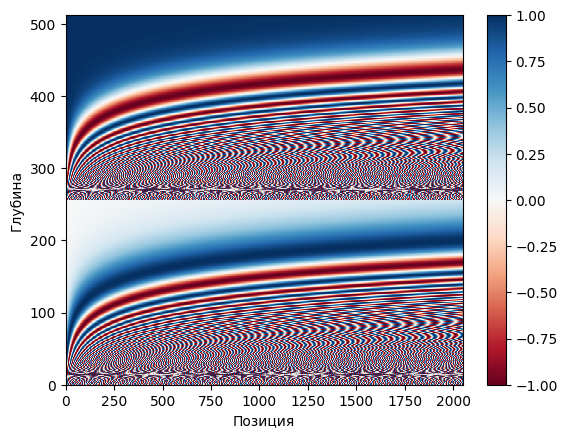

In [ ]:
#@title
pos_encoding = positional_encoding(length=2048, depth=512)

# Check the shape.
print(pos_encoding.shape)

# Plot the dimensions.
plt.pcolormesh(pos_encoding.numpy().T, cmap='RdBu')
plt.ylabel('Глубина')
plt.xlabel('Позиция')
plt.colorbar()
plt.show()

Цель этого графика - визуализировать матрицу позиционного кодирования и увидеть, как она изменяется в зависимости от положения и глубины последовательности. Это также помогает обеспечить правильную нормализацию и распределение значений кодирования по матрице

Давайте визуализируем косинусное сходство между вектором позиционного кодирования с индексом 1000 и всеми остальными векторами в матрице позиционного кодирования.

Векторы позиционного кодирования сначала нормализуются с помощью `L2` нормализации. Затем код вычисляет скалярное произведение между вектором позиционного кодирования с индексом 1000 и всеми остальными векторами в матрице, используя функцию `einsum`. Полученные точечные произведения отображаются на графике, где ось `y` представляет значения косинусного сходства между векторами.


(0.0, 1.0)

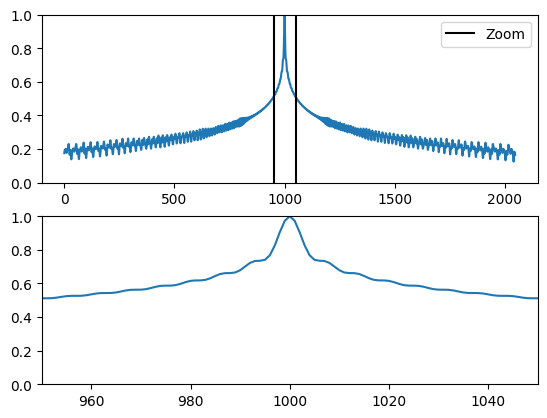

In [ ]:
#@title
pos_encoding/=tf.norm(pos_encoding, axis=1, keepdims=True)
p = pos_encoding[1000]
dots = tf.einsum('pd,d -> p', pos_encoding, p)
plt.subplot(2,1,1)
plt.plot(dots)
plt.ylim([0,1])
plt.plot([950, 950, float('nan'), 1050, 1050],
         [0,1,float('nan'),0,1], color='k', label='Zoom')
plt.legend()
plt.subplot(2,1,2)
plt.plot(dots)
plt.xlim([950, 1050])
plt.ylim([0,1])


На первом графике показан полный график косинусного сходства, в то время как на втором графике увеличены значения косинусного сходства между индексами 950 и 1050.

Эта визуализация помогает проиллюстрировать, как векторы позиционного кодирования кодируют информацию о местоположении каждого токена в последовательности. Значения косинусоидального подобия являются самыми высокими для векторов, расположенных близко друг к другу вдоль оси координат, что указывает на то, что они содержат сходную информацию о местоположении.

Создадим класс `Position Embedding`. Это `tf.keras.layers.Layer`, который объединяет слой embedding и слой позиционного кодирования для создания слоя, который можно использовать для кодирования входных последовательностей в модели `transformer`.

Класс принимает два аргумента: `vocab_size`, который является размером словаря входных последовательностей, и `d_model`, который является размером векторов embedding и позиционного кодирования.

В конструкторе он создает слой `Embedding`, который сопоставляет входные токены с их соответствующими векторами встраивания, и матрицу позиционного кодирования формы `(max_length, d_model)`, используя функцию `positional_encoding`.

Метод `compute_mask` этого класса возвращает маску той же формы, что и входной тензор для слоя embedding.

В методе `call` входной тензор сначала передается через слой embedding, а затем масштабируется на квадратный корень из значения `d_model`. Затем матрица позиционного кодирования добавляется к выходным данным embedding, соответствующим каждому входному токену. Наконец, возвращается закодированная входная последовательность.

In [ ]:
class PositionalEmbedding(tf.keras.layers.Layer):
  """
  Этот слой объединяет входной embedding с позиционным кодированием, которое помогает трансформеру понять
относительное расположение токенов в последовательности. Он принимает входную последовательность токенов и преобразует ее в
последовательность векторов embedding, а затем добавляет к ней информацию о местоположении.

  Аттрибуты:
      vocab_size (int): Размер словаря, т.е. количество уникальных токенов во входной последовательности.
      d_model (int): Количество измерений в векторе встраивания.

  Методы:
      compute_mask(*args, **kwargs): Вычисляет маску, которая будет применена к вложениям.
      call(x): Выполняет вычисления для слоя.

  """
  def __init__(self, vocab_size, d_model):
    """
    Инициализируем слой PositionalEmbedding.

    Аргументы:
        vocab_size (int): Размер словаря, т.е. количество уникальных токенов во входной последовательности.
        d_model (int): Количество измерений в векторе embedding.
    """
    super().__init__()
    self.d_model = d_model
    self.embedding = tf.keras.layers.Embedding(vocab_size, d_model, mask_zero=True)
    self.pos_encoding = positional_encoding(length=2048, depth=d_model)

  def compute_mask(self, *args, **kwargs):
    """
    Вычисляет маску, которая будет применена к вложениям.

    Аргументы:
        *args: Список аргументов переменной длины.
        **kwargs: Произвольные аргументы ключевого слова.

    Выходы:
        Маска, которая будет применена к встраиваемым элементам.
    """
    return self.embedding.compute_mask(*args, **kwargs)

  def call(self, x):
    """
    Вычисляет выходные данные слоя.

    Аргументы:
        x (tf.Tensor): Входная последовательность токенов.

    Выходы:
        Выходная последовательность векторов embedding с добавленной позиционной информацией.
    """
    length = tf.shape(x)[1]
    x = self.embedding(x)
    # Этот коэффициент устанавливает относительный масштаб встраивания и позиционного кодирования.
    x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
    x = x + self.pos_encoding[tf.newaxis, :length, :]
    return x


In [ ]:
class PositionalEmbedding(tf.keras.layers.Layer):
  def __init__(self, vocab_size, d_model):
    super().__init__()
    self.d_model = d_model
    self.embedding = tf.keras.layers.Embedding(vocab_size, d_model, mask_zero=True)
    self.pos_encoding = positional_encoding(length=2048, depth=d_model)

  def compute_mask(self, *args, **kwargs):
    return self.embedding.compute_mask(*args, **kwargs)

  def call(self, x):
    length = tf.shape(x)[1]
    x = self.embedding(x)
    # Этот коэффициент устанавливает относительный масштаб встраивания и позиционного кодирования.
    x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
    x = x + self.pos_encoding[tf.newaxis, :length, :]
    return x

In [ ]:
vocab_size=tokenizers.pt.get_vocab_size()
vocab_size

<tf.Tensor: shape=(), dtype=int32, numpy=7765>

**Примечание:**  Согласно [руководству по tensflow] (https://www.tensorflow.org/text/tutorials/transformer), в [оригинальной статье] (https://arxiv.org/pdf/1706.03762.pdf), разделах 3.4 и 5.1, используется единый токенизатор и весовая матрица как для исходного, так и для целевого языков. Здесь используются два отдельных токенизатора и весовые матрицы.

Создадим два экземпляра класса `PositionalEmbedding`, один для португальского токенизатора и один для английского токенизатора. Мы передаем размер словаря каждого токенизатора и значение для `d_model`, которое является размерностью вектора внедрения.

Затем мы вызываем эти экземпляры в наших токенизированных предложениях на португальском и английском языках (`pt` и `en`) соответственно. Результатом каждого вызова является встроенное представление предложения, где каждый токен представлен в виде вектора с добавленной к нему позиционной кодировкой, как описано в классе `PositionalEmbedding`.

Полученные в результате встраивания данные могут быть использованы в качестве входных данных для кодера и декодера модели трансформера.

In [ ]:
embed_pt = PositionalEmbedding(vocab_size=tokenizers.pt.get_vocab_size().numpy(), d_model=512)
embed_en = PositionalEmbedding(vocab_size=tokenizers.en.get_vocab_size().numpy(), d_model=512)

pt_emb = embed_pt(pt)
en_emb = embed_en(en)

В `Keras` маскирование используется для указания временных шагов, которые следует игнорировать во время обработки, например, для заполнения временных шагов. Атрибут `_keras_mask` возвращает логический тензор той же формы, что и `en_emb`, который указывает, какие временные шаги следует маскировать (`True` для замаскированных временных шагов, `False` для немаскированных временных шагов). Если временной интервал замаскирован, это означает, что соответствующие ему значения будут проигнорированы во время вычисления.

In [ ]:
en_emb._keras_mask

<tf.Tensor: shape=(64, 86), dtype=bool, numpy=
array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])>

### 2.4.5. Add и normalize

<table>
<tr>
  <th colspan=2>Add and normalize</th>
<tr>
<tr>
  <td>
   <img src="https://www.tensorflow.org/images/tutorials/transformer/Add+Norm.png"/>
  </td>
</tr>
</table>

Блоки `Add & Norm` используются в модели `Transformer` и помогают в эффективном обучении. Эти блоки состоят из остаточного соединения, которое обеспечивает прямой путь для градиента и гарантирует, что векторы обновляются, а не заменяются уровнями внимания, и слоя `LayerNormalization`, который поддерживает приемлемый масштаб для выходных данных. Эти блоки разбросаны по всей модели, и код организован вокруг них. Для каждого блока определены пользовательские классы слоев. Слой добавления используется в реализации для обеспечения распространения масок `Keras`, поскольку оператор `+` этого не делает.

**Примечание:** В случае остаточного добавления исходные входные данные слоя добавляются к выходным данным этого слоя, создавая "остаточное" соединение, которое позволяет градиенту обходить слой во время обратного распространения. Это помогает предотвратить исчезновение градиентов и позволяет весам продолжать обновляться во время тренировки. В случае модели `Transformer` остаточные соединения используются в сочетании с нормализацией уровня, что повышает эффективность тренировки и поддерживает приемлемый масштаб результатов.

### 2.4.6. Слой внимания



<table>
<tr>
  <th colspan=2>The base attention layer</th>
<tr>
<tr>
  <td>
   <img src="https://www.tensorflow.org/images/tutorials/transformer/BaseAttention.png"/>
  </td>
</tr>
</table>

Модель включает в себя блоки внимания, каждый из которых содержит `layers.MultiHeadAttention`, `layers.LayerNormalization` и `layers.Add`. Чтобы создать эти уровни внимания, сначала определяем базовый класс, который включает в себя эти три компонента, а затем создаем специальные подклассы для каждого варианта использования. Хотя это требует написания большего количества кода, такой подход помогает сохранить реализацию организованной и простой для понимания.

Класс содержит три слоя, `tf.keras.layers.MultiHeadAttention`, `tf.keras.layers.LayerNormalization`, и `tf.keras.layers.Add`.

- Слой `tf.keras.layers.MultiHeadAttention` отвечает за вычисление весов внимания между входной и выходной последовательностями.
- Слой `tf.keras.layers.LayerNormalization` нормализует активацию слоя в измерениях пакета и объекта.
- `tf.keras.layers.Add` добавляет выходные данные слоя `MultiHeadAttention` к исходной входной последовательности, используя остаточное соединение.

Создав базовый класс с этими уровнями, мы можем повторно использовать этот код для создания различных механизмов управления вниманием, наследуя от этого класса и определяя конкретные детали реализации. Это помогает сохранить код организованным и понятным.


In [ ]:
class BaseAttention(tf.keras.layers.Layer):
  """
  Базовый класс слоя Attention, который содержит MultiHeadAttention, LayerNormalization и Add слой.

  Аттрибуты:

  kwargs: dict
      аргументы ключевых слов, которые будут переданы на уровень MultiHead Attention во время инициализации.

  Методы:

  call(inputs, mask=None, training=None):
      Выполняет прямой проход по входным данным и возвращает выходные данные.

  """
  def __init__(self, **kwargs):
    """
    Инициализирует новый экземпляр базового класса уровня внимания.

    Параметры:
    -----------
    kwargs: dict
        аргументы ключевых слов, которые будут переданы на уровень MultiHead Attention во время инициализации.
    """
    super().__init__()
    self.mha = tf.keras.layers.MultiHeadAttention(**kwargs)
    self.layernorm = tf.keras.layers.LayerNormalization()
    self.add = tf.keras.layers.Add()

**Как работает внимание?**

На уровне внимания есть два входных сигнала: **последовательность запросов** и ** контекстная последовательность**. Последовательность запросов - это обрабатываемая последовательность, в то время как контекстная последовательность - это последовательность, на которую обращают внимание. Выходные данные имеют ту же форму, что и последовательность запросов.

Работу уровня внимания часто сравнивают с поиском по словарю, но с нечеткими, дифференцируемыми и векторизованными характеристиками. Как и поиск по словарю, запрос используется для поиска соответствующей информации, которая представлена в виде **ключей** и **значений**. При поиске запроса в обычном словаре возвращается соответствующий ключ и соответствующее ему значение. Однако в нечетком словаре запрос не обязательно должен идеально соответствовать ключу, чтобы возвращаемое значение соответствовало ему.

Например, если мы выполним поиск по ключу "вид" в словаре `{'color': 'blue', 'age': 22, 'type': 'pickup'}`, он может вернуть значение "pickup" как наиболее подходящее для запроса.

**Уровень внимания работает аналогично поиску по нечеткому словарю, но вместо того, чтобы возвращать одно значение, он объединяет несколько значений в зависимости от того, насколько хорошо они соответствуют запросу.** Запрос, ключ и значение на уровне внимания представлены в виде векторов. Вместо использования поиска по хэшу, уровень внимания объединяет запрос и ключевые векторы, чтобы определить, насколько хорошо они совпадают, что называется оценкой внимания. Затем значения объединяются путем вычисления средневзвешенного значения всех значений, где веса определяются оценками внимания.

В контексте NLP последовательность запросов может предоставлять вектор запроса в каждом местоположении, в то время как последовательность контекста служит словарем с ключом и вектором значений в каждом местоположении. Перед использованием входных векторов используются `layers.MultiHeadAttention` включает в себя `layers.Dense` слои для проецирования входных векторов.

Cоздадим:

- Перекрестный уровень внимания: Decoder-encoder attention
- Глобальный уровень самовнимания: Encoder self-attention
- Каузальный уровень самовнимания: Decoder self-attention

![рисунок](https://github.com/arminnorouzi/machine_learning_course_UofA_MECE610/blob/main/L07_Generative_AI/figures/transformers.png?raw=true) Источник: [1-2]

#### 2.4.6.1. Перекрестный уровень внимания: Decoder-encoder attention


<table>
<tr>
  <th colspan=1>The cross attention layer</th>
<tr>
<tr>
  <td>
   <img src="https://www.tensorflow.org/images/tutorials/transformer/CrossAttention.png"/>
  </td>
</tr>
</table>

Напишем класс `Cross Attention`, унаследовав его от класса `Base Attention`, который содержит многоуровневый уровень внимания, уровень нормализации уровня и дополнительный уровень.

Метод `call` принимает два входных аргумента, `x` и `context`. `x` - это последовательность запросов, которая обрабатывается и выполняет проверку, а `context` - это последовательность `context`, на которую обращают внимание.

Метод `call` передает `x` и `context` на уровень `self.mha`  (multi-head attention), который возвращает тензор выходных данных внимания и тензор оценок внимания. Атрибуту `self.last_attn_scores` присваивается значение тензора оценок внимания для последующего построения графика.

Затем тензор выходного сигнала `attention` добавляется к исходному тензору `x`  с помощью слоя `self.add`, и результат нормализуется с помощью слоя `self.layernorm`. Затем возвращается окончательный результат.

In [ ]:
class CrossAttention(BaseAttention):
  """
  Класс, реализующий механизм перекрестного внимания путем наследования от класса BaseAttention.
  Перекрестное внимание используется для обработки двух разных последовательностей и учитывает контекстную последовательность при обработке
  последовательности запросов.
  Наследует:
      BaseAttention: Базовый класс, который определяет слой MultiHeadAttention, LayerNormalization, и Add operation.
  Аргументы:
      **kwargs: Аргументы для передачи в слой MultiHeadAttention.
  """
  def call(self, x, context):
    """
    Функция вызова, которая выполняет операцию перекрестного внимания.

    Аргументы:
        x: Тензор последовательности запросов, shape=(batch_size, seq_len, embedding_dim)
        context: Тензор контекстной последовательности, shape=(batch_size, seq_len, embedding_dim)

    Выходы:
        Соответствующий тензор выходных данных, shape=(batch_size, seq_len, embedding_dim)
    """
    attn_output, attn_scores = self.mha(
        query=x,
        key=context,
        value=context,
        return_attention_scores=True)

    # Сохраним результаты оценки внимания для последующего построения графика.
    self.last_attn_scores = attn_scores

    x = self.add([x, attn_output])
    x = self.layernorm(x)

    return x

In [ ]:
sample_ca = CrossAttention(num_heads=2, key_dim=512)

print(pt_emb.shape)
print(en_emb.shape)
print(sample_ca(en_emb, pt_emb).shape)

(64, 79, 512)
(64, 86, 512)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:915: UserWarning: Layer 'query' (of type EinsumDense) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:915: UserWarning: Layer 'key' (of type EinsumDense) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:915: UserWarning: Layer 'value' (of type EinsumDense) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


(64, 86, 512)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:915: UserWarning: Layer 'cross_attention' (of type CrossAttention) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


Выходная `length` - это длина последовательности запроса, а не длина контекстной последовательности `key/value`.

#### 2.4.6.2. Глобальный слой самовнимания: Encoder self-attention

<table>
<tr>
  <th colspan=1>The global self-attention layer</th>
<tr>
<tr>
  <td>
   <img src="https://www.tensorflow.org/images/tutorials/transformer/SelfAttention.png"/>
  </td>
</tr>
</table>

Этот слой отвечает за обработку контекстной последовательности и распространение информации по всей ее длине. Напишем `GlobalSelfAttention`, унаследовав его от уровня `baseAttention`.

В `GlobalSelfAttention` есть только один входной сигнал `x`, который представляет собой последовательность векторов, представляющих обрабатываемую последовательность. Этот входной сигнал используется в качестве запроса, ключа и значения для механизма `multi-head attention` (`MHA`). `MHA` вычисляет средневзвешенное значение значений на основе того, насколько хорошо запрос соответствует ключам, где баллы за внимание определяют вес каждого значения.

Другими словами, `MHA` учится избирательно фокусироваться на различных частях входной последовательности, что может помочь модели получить релевантную информацию для конкретной задачи. В `GlobalSelfAttention`, поскольку входная последовательность используется как для `query`, так и для `key`, она фиксирует взаимосвязь между каждой позицией и всеми другими позициями в последовательности.

Наконец, выходные данные `MHA` добавляются к исходным входным данным, после чего выполняется нормализация уровня, чтобы получить окончательный результат для уровня внимания. Нормализация помогает стабилизировать процесс обучения и повышает производительность модели.

In [ ]:
class GlobalSelfAttention(BaseAttention):
  def call(self, x):
    """
    Применим глобальный механизм self-attention к входной последовательности

    Аргументы:
        x: Тензор размерности `(batch_size, seq_len, embedding_dim)`
        представляющий входную последовательность.

    Выходы:
        Тензор той же формы, что и входные данные, представляющий последовательность
        после преобразования механизмом self-attention.
    """
    attn_output = self.mha(
        query=x,
        value=x,
        key=x)
    x = self.add([x, attn_output])
    x = self.layernorm(x)
    return x

In [ ]:
sample_gsa = GlobalSelfAttention(num_heads=2, key_dim=512)

print(pt_emb.shape)
print(sample_gsa(pt_emb).shape)

(64, 79, 512)
(64, 79, 512)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:915: UserWarning: Layer 'global_self_attention' (of type GlobalSelfAttention) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


Выходной тензор имеет ту же размерность, что и входной

#### 2.4.6.3. Слой каузального самовнимания: Decoder self-attention

<table>
<tr>
  <th colspan=1>The causal self-attention layer</th>
<tr>
<tr>
  <td>
   <img src="https://www.tensorflow.org/images/tutorials/transformer/CausalSelfAttention.png"/>
  </td>
</tr>
</table>

Этот слой выполняет ту же работу, что и слой глобального внимания к себе, для выходной последовательности.  Напишем класс `CausalSelfAttention`, унаследовав его от слоя `baseAttention`.

Класс `CausalSelfAttention` - это тип слоя self-attention, используемый в нейронных сетях для задач моделирования последовательности, где выходные данные на каждом временном шаге могут зависеть только от предыдущих временных шагов, а не от будущих временных шагов. В таких задачах уровень каузального самовнимания используется для обеспечения соблюдения ограничения, согласно которому модель может выполнять только предыдущие временные шаги в процессе декодирования.

Метод `call` этого класса принимает тензор `x` в качестве входных данных и применяет к нему механизм каузального самовнимания. В частности, в этом методе используется метод `mha` (multi-head attention) класса `BaseAttention` с входными данными `query`, `key` и `value`, равными `x`. Кроме того, аргументу `use_causal_mask` метода mha присвоено значение `True`, которое применяет причинно-следственную маску к показателям внимания, чтобы **гарантировать, что модель может отслеживать только предыдущие временные шаги**.

После применения механизма каузального самовнимания метод добавляет выходные данные к исходному входному тензору `x` и нормализует результат, используя нормализацию слоя. Наконец, нормализованный тензор возвращается в качестве выходных данных метода.

In [ ]:
class CausalSelfAttention(BaseAttention):
  """
  каждая позиция на выходе зависит только от предыдущих позиций (т.е. от причинно-следственной модели).

  Аргументы:
      x: Тензор входной постледовательности размерности `(batch_size, seq_len, embed_dim)`.

  Выходы:
      Тензор выходной последовательности той же формы, что и входной, после self-attention
      и остаточной связи с применением слоя нормализации

  """
  def call(self, x):
    attn_output = self.mha(
        query=x,
        value=x,
        key=x,
        use_causal_mask = True)
    x = self.add([x, attn_output])
    x = self.layernorm(x)
    return x

In [ ]:
sample_csa = CausalSelfAttention(num_heads=2, key_dim=512)

print(en_emb.shape)
print(sample_csa(en_emb).shape)

(64, 86, 512)
(64, 86, 512)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:915: UserWarning: Layer 'causal_self_attention' (of type CausalSelfAttention) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


Выходные данные для предыдущих элементов последовательности не зависят от более поздних элементов, поэтому не должно иметь значения, обрезаете ли вы элементы до или после нанесения слоя:

In [ ]:
out1 = sample_csa(embed_en(en[:, :3]))
out2 = sample_csa(embed_en(en))[:, :3]

tf.reduce_max(abs(out1 - out2)).numpy()

5.9604645e-07

Разница между до и после обрезки `tf.reduce_max(abs(out1 - out2)).numpy()` равна нулю.


### 2.4.7. Сеть прямой связи

Трансформер включает в себя точечную сеть прямой связи (point-wise feed-forward network ) как в кодере, так и в декодере:

<table>
<tr>
  <th colspan=1>The feed forward network</th>
<tr>
<tr>
  <td>
   <img src="https://www.tensorflow.org/images/tutorials/transformer/FeedForward.png"/>
  </td>
</tr>
</table>

Реализуем сеть прямой связи.

Класс `FeedForward` - это пользовательский уровень в `TensorFlow`, который реализует нейронную сеть прямой связи. Он обычно используется в моделях на основе `transformer`, таких как `BERT` и `GPT2`, для обработки представления каждого токена.

Слой принимает в качестве входных данных тензор `x` размерности `(batch_size, seq_len, d_model)`, где `d_model` - это размер последнего измерения. Он передает тензор `x` через сеть прямой связи, состоящую из двух плотных слоев со скрытыми модулями `dff` и функцией активации `relu`. После первого плотного слоя также применяется `dropout_rate`, чтобы предотвратить переобучение. Выходные данные сети прямой связи добавляются к исходным входным данным `x` с помощью слоя `Add()`. Наконец, выходные данные нормализуются с помощью слоя `LayerNormalization()`.

Слой `FeedForward` может выполнять более сложные функции, чем простой линейный слой, что делает его полезным для моделирования нелинейных взаимосвязей между входными и выходными данными.


In [ ]:
class FeedForward(tf.keras.layers.Layer):
  """
  Реализует подуровень прямой связи блока трансформера.

  Параметры:

  d_model: int
      Количество ожидаемых функций во входных и выходных данных.
  dff: int
      Количество нейронов в первом плотном слое.
  dropout_rate: float, optional (default=0.1)
      Коэффициент dropout rate для использования.

  Аттрибуты:

  seq: tf.keras.Sequential
      Модель как последовательность, в которой применяются два полносвязных слоя и Dropout.
  add: tf.keras.layers.Add
      Дополнительный слой, который добавляет остаточное соединение.
  layer_norm: tf.keras.layers.LayerNormalization
      Слой нормализации, примененный к выходным данным.

  Методы:

  call(x):
      Вычисляет подуровень прямой связи для входного тензора x и возвращает выходные данные.

  """
  def __init__(self, d_model, dff, dropout_rate=0.1):
    super().__init__()
    self.seq = tf.keras.Sequential([
      tf.keras.layers.Dense(dff, activation='relu'),
      tf.keras.layers.Dense(d_model),
      tf.keras.layers.Dropout(dropout_rate)
    ])
    self.add = tf.keras.layers.Add()
    self.layer_norm = tf.keras.layers.LayerNormalization()

  def call(self, x):
    """
    Передает входной тензор "x" через сеть прямой связи, состоящую из двух
полносвязных слоев со скрытыми модулями "dff" и функцией активации "relu".
    После первого плотного слоя применяется "dropout_rate", чтобы предотвратить переобучение.
    Выходные данные сети прямой связи добавляются к исходным входным данным "x" с помощью
слоя "Add()". Наконец, выходные данные нормализуются с помощью слоя "LayerNormalization()".

    Аргументы:
        x (tf.Tensor): Входной тензор размерности `(batch_size, seq_len, d_model)`.

    Выходы:
        tf.Tensor: Выходной тензор размерности `(batch_size, seq_len, d_model)`.
    """
    x = self.add([x, self.seq(x)])
    x = self.layer_norm(x)
    return x


Протестируйте слой, на выходе он должен иметь ту же размерность, что и на входе:

In [ ]:
sample_ffn = FeedForward(512, 2048)

print(en_emb.shape)
print(sample_ffn(en_emb).shape)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:915: UserWarning: Layer 'sequential' (of type Sequential) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


(64, 86, 512)
(64, 86, 512)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:915: UserWarning: Layer 'feed_forward' (of type FeedForward) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


### 2.4.8. Encoder

<table>
<tr>
  <th colspan=1>The encoder layer</th>
<tr>
<tr>
  <td>
   <img src="https://www.tensorflow.org/images/tutorials/transformer/EncoderLayer.png"/>
  </td>
</tr>
</table>

Кодировщик состоит из слоя `PositionalEmbedding` на входе и стека слоев `EncoderLayer`. Каждый `EncoderLayer` содержит слой `GlobalSelfAttention` и слой `FeedForward`.

Напишем класс для `EncoderLayer` и объединим `GlobalSelfAttention` и `FeedForward`, затем используем стек `EncoderLayer` и `PositionalEmbedding` для создания `Encoder`.

In [ ]:
class EncoderLayer(tf.keras.layers.Layer):
  """
  Один слой в стэке кодеров transformers.

  Аргументы:
    d_model (int): Размерность входных и выходных последовательностей.
    num_heads (int): Количество уровней внимания (голов), которые будут использоваться на подуровне самовнимания.
    dff (int): Количество скрытых объектов в подуровне прямой связи.
    dropout_rate (float): Коэффициент dropout, который будет применен после подуровня self-attention.

  Аттрибуты:
    self_attention (GlobalSelfAttention): Слой самовнимания.
    ffn (FeedForward): Уровень нейронной сети с прямой связью.
  """
  def __init__(self,*, d_model, num_heads, dff, dropout_rate=0.1):
    super().__init__()

    self.self_attention = GlobalSelfAttention(
        num_heads=num_heads,
        key_dim=d_model,
        dropout=dropout_rate)

    self.ffn = FeedForward(d_model, dff)

  def call(self, x):
    """
    Применяет прямой проход слоя кодировщика.

    Аргументы:
      x (tf.Tensor): Тензор входной последовательности.

    Выходы:
      tf.Tensor: тензор выходной последовательности.
    """
    x = self.self_attention(x)
    x = self.ffn(x)
    return x

Класс `EncoderLayer` представляет собой отдельный уровень в стеке кодировщиков `transformer`. Он состоит из двух подуровней: уровня самообучения и уровня нейронной сети прямого действия.

Функция `__init__` инициализирует объект `ncoderLayer`, создавая его подслои. Слой `self_attention` является экземпляром класса `GlobalSelfAttention`, который выполняет самовнимание во входной последовательности. Параметры `num_heads` и `key_dim` определяют количество голов для внимания и размерность ключей и значений в каждой голове соответственно. Параметр `dropout_rate` определяет уровень отсева, который будет применен после подуровня `self-attention`. Подуровень `ffn` является экземпляром класса `FeedForward`, который состоит из двух плотных слоев с активацией `ReLU`, за которыми следует слой dropout.

Функция `call` вызывается для применения прямого прохода `EncoderLayer`. Входная последовательность `x` передается через подуровень `self_attention`, за которым следует подуровень `ffn`, и возвращается результирующая выходная последовательность.

Теперь построим Encodeer.

<table>
<tr>
  <th colspan=1>The encoder</th>
<tr>
<tr>
  <td>
   <img src="https://www.tensorflow.org/images/tutorials/transformer/Encoder.png"/>
  </td>
</tr>
</table>

In [ ]:
class Encoder(tf.keras.layers.Layer):
  """
  Пользовательский уровень Keras, который реализует кодировщик
архитектуры нейронной сети на основе transformer для задач обработки естественного языка, таких как
  перевод или классификация текста.

  Аргументы:
    num_layers (int): Количество слоев в кодере.
    d_model (int): Размерность выходного пространства.
    num_heads (int): Количество голов управления вниманием в мультиголовом
      механизме самовнимания.
    dff (int): Размерность полносвязной сети прямой связи.
    vocab_size (int): Размер словарного запаса языка ввода.
    dropout_rate (float): Коэффициент dropout для регуляризации.

  Аттрибуты:
    d_model (int): Размерность выходного пространства.
    num_layers (int): Количество слоев в кодере.
    pos_embedding (PositionalEmbedding): Слой, который запоминает позицию
      вложения для каждого токена во входной последовательности.
    enc_layers (list): Список экземпляров "EncoderLayer", по одному для каждого уровня
      в архитектуре encoder.
    dropout (Dropout): Коэффициент dropout для регуляризации.

  Методы:
    call(x): Прямой проход уровня кодировщика.

  Выходы:
    Выходной тензор слоя кодера размерности `(batch_size, seq_len, d_model)`.
  """
  def __init__(self, *, num_layers, d_model, num_heads,
               dff, vocab_size, dropout_rate=0.1):
    super().__init__()

    self.d_model = d_model
    self.num_layers = num_layers

    self.pos_embedding = PositionalEmbedding(
        vocab_size=vocab_size, d_model=d_model)

    self.enc_layers = [
        EncoderLayer(d_model=d_model,
                     num_heads=num_heads,
                     dff=dff,
                     dropout_rate=dropout_rate)
        for _ in range(num_layers)]
    self.dropout = tf.keras.layers.Dropout(dropout_rate)

  def call(self, x):
    """
    Выполняет прямой проход слоя "Кодировщик".

    Аргументы:
    x: тензор размерности (batch_size, sequence_length) представляющий последовательность входных идентификаторов токенов.

    Выходы:
    тензор размерности (batch_size, sequence_length, d_model) представляющий выходные данные после применения
    уровней самовнимания и обратной связи к входной последовательности.
    """
    # `x` - это разменность token-IDs: (batch, seq_len)
    x = self.pos_embedding(x)  # размерность `(batch_size, seq_len, d_model)`.

    # Добавляем dropout.
    x = self.dropout(x)

    for i in range(self.num_layers):
      x = self.enc_layers[i](x)

    return x  # размерность `(batch_size, seq_len, d_model)`.

Этот код определяет класс `Encoder`, который используется в архитектуре Transformer для задач обработки естественного языка, таких как языковой перевод и языковое моделирование.

Класс `Encoder` является подклассом `tf.keras.слои.Класс Layer`, который является базовым классом для реализации новых слоев в `Keras`.

Метод `__init__` инициализирует объект `Encoder` путем определения параметров модели, таких как `d_model` (размер выходного пространства), `num_heads` (количество голов в механизме multi-head attention), `dff` (размер сети прямой связи), `vocab_size` (размер словаря входных токенов) и `dropout_rate` (скорость отсева, которая будет применена к выходным данным слоя).

Атрибут `post_embedding` инициализирует слой `PositionalEmbedding` , который добавляет позиционную информацию к входным токенам, чтобы учесть их положение в последовательности.

Атрибут `enc_layers` инициализирует список объектов `EncoderLayer`, каждый из которых реализует функциональность `EncoderLayer`. Количество слоев в `encoder` определяется параметром `num_layers`.

Атрибут `dropout` инициализирует слой dropout, чтобы применить его к выходным данным слоя.

Метод `call` вызывается при вызове слоя для входных данных. Он применяет позиционное встраивание к входным токенам, а затем применяет выпадающий слой. Затем он итеративно применяет объект `EncoderLayer` к выходным данным предыдущего слоя. Конечный результат возвращается в виде тензора формы `(batch_size, seq_len, d_model)`.

Протестируем encoder

In [ ]:
# Создаем экземпляр кодировщика.
sample_encoder = Encoder(num_layers=4,
                         d_model=512,
                         num_heads=8,
                         dff=2048,
                         vocab_size=8500)

sample_encoder_output = sample_encoder(pt, training=False)

# выводим размерность.
print(pt.shape)
print(sample_encoder_output.shape)  # размерность `(batch_size, input_seq_len, d_model)`.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:915: UserWarning: Layer 'global_self_attention_1' (of type GlobalSelfAttention) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:915: UserWarning: Layer 'sequential_1' (of type Sequential) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:915: UserWarning: Layer 'feed_forward_1' (of type FeedForward) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(

(64, 79)
(64, 79, 512)


### 2.4.9. Decoder

<table>
<tr>
  <th colspan=1>The decoder layer</th>
<tr>
<tr>
  <td>
   <img src="https://www.tensorflow.org/images/tutorials/transformer/DecoderLayer.png"/>
  </td>
</tr>
</table>

Подобно `Encoder`, ``Decoder` состоит из `PositionalEmbedding` и стека `DecoderLayer`. А стек декодера немного сложнее, поскольку каждый `DecoderLayer` содержит слой `CausalSelfAttention`, слой `CrossAttention` и слой `FeedForward`.

Сначала напишем `DecoderLayer`, а затем `Encoder`.

Определим класс `DecoderLayer`, который является строительным блоком для декодера на основе преобразования в модели последовательностей. Класс наследуется от `tf.keras.layers.Layer`.

В классе есть метод `__init__`, который инициализирует параметры слоя и подслоев. Он принимает следующие аргументы:

- `d_model`: количество ожидаемых функций во входных и выходных данных.
- `num_heads`: Количество параллельных голов внимания.
- `df`: Количество нейронов в подуровне прямой связи.
- `dropout_rate`: применяемый коэффициент отсева.


Метод `call` определяет, как использовать слой при прямом переходе. Он принимает два аргумента: `x` и `context`. `x` - это входные данные для уровня декодирования, которые передаются через подуровни каузального самовнимания, перекрестного внимания и прямой связи для получения выходных данных `x`. `context` - это выходные данные уровня кодирования, которые используются в качестве контекста внимания для механизма перекрестного внимания.

Класс содержит следующие подуровни:

- `causal_self_attention`: уровень каузального само-внимания, который отслеживает входную последовательность каузальным образом, т.е. предсказывает будущие токены на основе предыдущих.
- `cross_attention`: уровень перекрестного внимания, который использует контекст вывода кодера для согласования выходных данных декодера с входной последовательностью.
- `ffn`: Подуровень прямой связи, который применяет нелинейное преобразование к выходным данным подуровней `attention`.

Метод `call` также кэширует последние оценки внимания, вычисленные на подуровне `cross_attention`, которые могут быть использованы для целей визуализации и отладки.

In [ ]:
class DecoderLayer(tf.keras.layers.Layer):
  """
  Одноуровневый декодер в архитектуре на основе трансформера.

  Аргументы:
    d_model (int): Количество ожидаемых функций во входных данных.
    num_heads (int): Количество голов внимания.
    dff (int): Размерность сети прямой связи.
    dropout_rate (float): Коэффициент dropout, который ипользуется.

  Аттрибуты:
    causal_self_attention: AЭкземпляр слоя `CausalSelfAttention`.
    cross_attention: Экземпляр слоя `CrossAttention`.
    ffn: Экземпляр слоя `FeedForward`.
    last_attn_scores: Тензор, содержащий последние оценки внимания.

  """
  def __init__(self,
               *,
               d_model,
               num_heads,
               dff,
               dropout_rate=0.1):
    super(DecoderLayer, self).__init__()

    self.causal_self_attention = CausalSelfAttention(
        num_heads=num_heads,
        key_dim=d_model,
        dropout=dropout_rate)

    self.cross_attention = CrossAttention(
        num_heads=num_heads,
        key_dim=d_model,
        dropout=dropout_rate)

    self.ffn = FeedForward(d_model, dff)

  def call(self, x, context):
    """
    Прямой проход по `DecoderLayer`.

    Аргументы:
      x (tf.Tensor): входной тензор размерности
      `(batch_size, target_seq_len, d_model)`.
      context (tf.Tensor): Контекстный тензор размерности
      `(batch_size, input_seq_len, d_model)`.

    Выходы:
      выходной тензор `DecoderLayer` размерности
      `(batch_size, target_seq_len, d_model)`.

    """
    x = self.causal_self_attention(x=x)
    x = self.cross_attention(x=x, context=context)

    # Сохраним последние оценки за внимание для последующего построения графика
    self.last_attn_scores = self.cross_attention.last_attn_scores

    x = self.ffn(x)  # размерность `(batch_size, seq_len, d_model)`.
    return x

Теперь поместим это в `Decoder` и напишем класс `Decoder`. Этот класс отвечает за декодирование закодированных входных последовательностей для генерации целевых последовательностей в моделях `sequence-to-sequence`. Уровень декодера состоит из нескольких блоков `DecoderLayer`, каждый из которых содержит механизм self-attention, механизм cross-attention и сеть прямой связи. Слой `Decoder` также включает в себя уровни позиционного embedding и dropout.

<table>
<tr>
  <th colspan=1>The embedding and positional encoding layer</th>
<tr>
<tr>
  <td>
   <img src="https://www.tensorflow.org/images/tutorials/transformer/Decoder.png"/>
  </td>
</tr>
</table>

In [ ]:
class Decoder(tf.keras.layers.Layer):
  """Модель декодера для последовательного обучения.

  Этот класс реализует слой декодера для модели на основе трансформера, используемой для задач последовательного обучения.
  Слой декодера принимает в качестве входных данных входные вложения, позиционные кодировки и маски внимания и возвращает выходные данные
  слоя декодера после применения механизма самовнимания с несколькими головами,
  за которым следует механизм перекрестного внимания с выводами из уровней кодера, а затем применяет нейронную сеть обратной связи.

  Аттрибуты:
    d_model (int): Количество выходных измерений для каждого слоя.
    num_layers (int): Количество слоев в декодере.
    pos_embedding (PositionalEmbedding): Слой positional embedding.
    dropout (Dropout): Слой dropout.
    dec_layers (list): Список объектов слоя декодера.
    last_attn_scores (ndarray): Оценка внимания последнего слоя декодера.

  Методы:
    call(x, context): Реализует прямой проход для слоя декодера.

  Аргументы:
        x (ndarray): Тензор размерности (batch_size, target_seq_len), представляющий входные token IDs.
        context (ndarray): A tensor of shape (batch_size, input_seq_len, d_model), представляющий выходные данные слоев кодера.
  Выходы:
        ndarray: Тензор размерности (batch_size, target_seq_len, d_model), представляющий выходные данные слоев декодера.
  """
  def __init__(self, *, num_layers, d_model, num_heads, dff, vocab_size,
               dropout_rate=0.1):
    super(Decoder, self).__init__()

    self.d_model = d_model
    self.num_layers = num_layers

    self.pos_embedding = PositionalEmbedding(vocab_size=vocab_size,
                                             d_model=d_model)
    self.dropout = tf.keras.layers.Dropout(dropout_rate)
    self.dec_layers = [
        DecoderLayer(d_model=d_model, num_heads=num_heads,
                     dff=dff, dropout_rate=dropout_rate)
        for _ in range(num_layers)]

    self.last_attn_scores = None

  def call(self, x, context):
    """
    Реализует прямой проход для уровня декодера.

    Аргументы:
      x (ndarray): Тензор размерности (batch_size, target_seq_len), представляющий входные token IDs.
      context (ndarray): Тензор размерности (batch_size, input_seq_len, d_model), представляющий выходные данные слоев кодера.

    Выходы:
      ndarray: Тензор размерности (batch_size, target_seq_len, d_model), представляющий выходные данные слоев декодера.
    """
    # `x` - размерность token-IDs (batch, target_seq_len)
    x = self.pos_embedding(x)  # (batch_size, target_seq_len, d_model)

    x = self.dropout(x)

    for i in range(self.num_layers):
      x  = self.dec_layers[i](x, context)

    self.last_attn_scores = self.dec_layers[-1].last_attn_scores

    # Размерность x - (batch_size, target_seq_len, d_model).
    return x

Класс `Decoder` ожидает в качестве входных данных последовательность идентификаторов токенов, представляющих целевую последовательность, и кодированную входную последовательность, или контекст, на который должен обратить внимание декодер. Класс состоит из стека экземпляров `DecoderLayer`, каждый из которых применяет ряд операций к входной последовательности для генерации выходной последовательности.

В конструкторе класс `Decoder` инициализирует несколько экземпляров слоя, включая слой `PositionalEmbedding`, который добавляет позиционное кодирование к входным идентификаторам токенов, слой `dropout` и стек экземпляров `DecoderLayer`.

Во время прямого прохождения входные идентификаторы токенов сначала передаются через уровни позиционного внедрения и выпадения. Затем для каждого `DecoderLayer` входные данные передаются через уровень каузального самовнимания, за которым следует уровень перекрестного внимания и, наконец, через уровень нейронной сети прямой связи. Выходные данные последнего "DecoderLayer" возвращаются в качестве выходных данных `Decoder`.

Атрибут `last_attn_scores` экземпляра `Decoder` содержит оценки внимания на последнем уровне декодера, которые могут быть полезны для визуализации и отладки.

In [ ]:
# Создайте экземпляр декодера.
sample_decoder = Decoder(num_layers=4,
                         d_model=512,
                         num_heads=8,
                         dff=2048,
                         vocab_size=8000)

output = sample_decoder(
    x=en,
    context=pt_emb)

# Выведем размерности.
print(en.shape)
print(pt_emb.shape)
print(output.shape)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:915: UserWarning: Layer 'causal_self_attention_1' (of type CausalSelfAttention) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:915: UserWarning: Layer 'cross_attention_1' (of type CrossAttention) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:915: UserWarning: Layer 'sequential_5' (of type Sequential) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings

(64, 86)
(64, 79, 512)
(64, 86, 512)


In [ ]:
sample_decoder.last_attn_scores.shape  # (batch, heads, target_seq, input_seq)

TensorShape([64, 8, 86, 79])

## 2.5. Transformer

<table>
<tr>
  <th colspan=1>The transformer</th>
<tr>
<tr>
  <td>
   <img src="https://www.tensorflow.org/images/tutorials/transformer/transformer.png"/>
  </td>
</tr>
</table>

`Encoder` и `Decoder` являются ключевыми компонентами модели `Transformer`, но их необходимо объединить, а затем создать окончательный слой `Dense` для получения вероятностей токенов. Теперь объединим эти два класса и создадим `Transformer`, расширяя `tf.keras.Model`.

In [ ]:
class Transformer(tf.keras.Model):
  """
  Модель Transformer, состоящая из кодера, декодера и конечного полносвязного слоя.

  Аргументы:
    num_layers (int): Количество уровней как в кодере, так и в декодере.
    d_model (int): Скрытый размер модели.
    num_heads (int): Количество голов внимания, используемых в модели.
    dff (int): Размер слоя прямой связи в кодере и декодере.
    input_vocab_size (int): Размер словарного запаса входных данных.
    target_vocab_size (int): Размер словарного запаса целевого объекта.
    dropout_rate (float): Коэффициент dropout, применяемый к выходным данным каждого подуровня.

  Аттрибуты:
    encoder (Encoder): Экземпляр класса Encoder.
    decoder (Decoder): Экземпляр класса Decoder.
    final_layer (Dense): Полносвязный слой, который преобразует конечный результат преобразования в вероятности выходных токенов.

  Методы:
    call(inputs): Прямой проход модели-трансформера.

  Выходы:
    logits (tf.Tensor): Выходной тензор конечного полносвязного слоя. Размерность (batch_size, target_len, target_vocab_size).
  """
  def __init__(self, *, num_layers, d_model, num_heads, dff,
               input_vocab_size, target_vocab_size, dropout_rate=0.1):
    super().__init__()
    self.encoder = Encoder(num_layers=num_layers, d_model=d_model,
                           num_heads=num_heads, dff=dff,
                           vocab_size=input_vocab_size,
                           dropout_rate=dropout_rate)

    self.decoder = Decoder(num_layers=num_layers, d_model=d_model,
                           num_heads=num_heads, dff=dff,
                           vocab_size=target_vocab_size,
                           dropout_rate=dropout_rate)

    self.final_layer = tf.keras.layers.Dense(target_vocab_size)

  def call(self, inputs):
    """
    Прямой проход модели-трансформера.

    Аргументы:
      inputs (tuple): Набор из двух тензоров. Первый тензор - это введенный контекстом тензор размерности (batch_size, context_len).
                      Второй тензор - это целевой входной тензор размерности (batch_size, target_len).

    Выходы:
      logits (tf.Tensor): Выходной тензор конечного полносвязного слоя. Размерность (batch_size, target_len, target_vocab_size).
    """

    # Чтобы использовать модель Keras с `.fit`, необходимо передать все свои входные данные в
    # первый аргумент.
    context, x  = inputs

    context = self.encoder(context)  # (batch_size, context_len, d_model)

    x = self.decoder(x, context)  # (batch_size, target_len, d_model)

    # Окончательный вывод линейного слоя.
    logits = self.final_layer(x)  # (batch_size, target_len, target_vocab_size)

    try:
      # Уберем маску keras, чтобы она не увеличивала losses/metrics.

      del logits._keras_mask
    except AttributeError:
      pass

    # Возвращаем конечный результат и значения весов внимания.
    return logits

Класс `Transformer` - это модель `Keras`, которая объединяет `Encoder` и `Decoder` для реализации архитектуры `Transformer`.

`Encoder` - это экземпляр класса `Encoder`, который принимает последовательность токенов в качестве входных данных и выводит последовательность векторов, представляющих контекстуальную информацию для каждого токена в последовательности.

`Decoder` - это экземпляр класса `Decoder`, который принимает последовательность целевых токенов и контекстную информацию от `Encoder` в качестве входных данных и выводит последовательность векторов, которые представляют контекстную информацию для каждого целевого токена в последовательности.

`final_layer` - это полносвязный слой Keras, который принимает выходные данные "Декодера" и сопоставляет их с последовательностью вероятностей целевых токенов.

Метод `call` класса `Transformer` принимает входной тензор `inputs`, который представляет собой набор из двух тензоров: тензора `context`, который является входной последовательностью для `Encoder`, и тензора `x`, который является целевой последовательностью для `Decoder`. Метод передает тензор `context` через `Encoder` для получения контекстуальной информации для каждого токена в последовательности, а затем передает тензор `x` и выходные данные `Encoder` в `Decoder` для генерации выходной последовательности. Наконец, метод передает выходные данные декодера через `final_layer`, чтобы получить вероятности целевых токенов. Метод возвращает `logits`, которые являются вероятностями целевых токенов, а также весами внимания.

Чтобы сохранить относительно быстрый и компактный пример, размер слоев, вложений и внутренние размеры слоя прямой связи в модели `Transformer` были уменьшены. В оригинальной статье использовалась базовая модель с `num_layers=6`, `d_model=512` и `dff=2048`. Однако количество голов `self-attention` в этом примере остается прежним, равным `num_heads=8`.

In [ ]:
num_layers = 4
d_model = 128
dff = 512
num_heads = 8
dropout_rate = 0.1

Cоздадим экземпляр модели `Transformer`:

In [ ]:
transformer = Transformer(
    num_layers=num_layers,
    d_model=d_model,
    num_heads=num_heads,
    dff=dff,
    input_vocab_size=tokenizers.pt.get_vocab_size().numpy(),
    target_vocab_size=tokenizers.en.get_vocab_size().numpy(),
    dropout_rate=dropout_rate)

Мы можем протестировать модель, прежде чем переходить к обучению модели.

In [ ]:
output = transformer((pt, en))

print(en.shape)
print(pt.shape)
print(output.shape)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:915: UserWarning: Layer 'global_self_attention_5' (of type GlobalSelfAttention) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:915: UserWarning: Layer 'sequential_9' (of type Sequential) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:915: UserWarning: Layer 'feed_forward_9' (of type FeedForward) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(

(64, 86)
(64, 79)
(64, 86, 7010)


## 2.6. Обучение

### 2.6.1. Оптимизатор

Используем оптимизатор `Adam`  с настраиваемым планировщиком скорости обучения в соответствии с формулой, приведенной в оригинальной [статье](https://arxiv.org/abs/1706.03762).


In [ ]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
  """
  Настраиваемый график темпа обучения, который реализует функцию темпа обучения
, описанную в оригинальной статье Transformer. Скорость обучения
линейно увеличивается для первых этапов обучения "warm up_steps", а затем уменьшается
пропорционально корню, обратному квадратному корню из номера шага.

  Аргументы:
    d_model (int): размерность модели.
    warmup_steps (int): количество шагов, выполняемых для увеличения скорости обучения
      линейно. Значение по умолчанию - 4000.

  Аттрибуты:
    d_model (float): размерность модели, float.
    warmup_steps (int): количество шагов, предпринятых для повышения скорости обучения
      линейно.

  Методы:
    __call__(step): возвращает скорость обучения на данном шаге.

  Выходы:
    Скорость обучения на данном этапе.
  """
  def __init__(self, d_model, warmup_steps=4000):
    super().__init__()

    self.d_model = d_model
    self.d_model = tf.cast(self.d_model, tf.float32)

    self.warmup_steps = warmup_steps

  def __call__(self, step):
    """
    Возвращает скорость обучения на данном шаге.

    Аргументы:
      step (int): текущий этап обучения.

    Выходы:
      Скорость обучения на данном шаге в виде тензора float32.
    """
    step = tf.cast(step, dtype=tf.float32)
    arg1 = tf.math.rsqrt(step)
    arg2 = step * (self.warmup_steps ** -1.5)

    return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

Класс `CustomSchedule` является подклассом `tf.keras.optimizers.schedules.LearningRateSchedule`. Он принимает два аргумента `d_model` и `warmup_steps`. `d_model` представляет размерность модели, которая преобразуется в `float32`. `warmup_steps` - это количество шагов для линейного увеличения скорости обучения перед ее снижением.

Метод `__call__` принимает единственный аргумент `step`, который представляет текущий шаг обучения. Он преобразует шаг в `float32` и вычисляет два аргумента `arg1` и `arg2`. `arg1` вычисляется путем извлечения `reciprocal` из `step`. `arg2` вычисляется путем умножения шага на обратный квадратный корень из `warmup_steps`, возведенный в степень `-1,5`.

Наконец, метод возвращает произведение обратного квадратного корня из `d_model` и минимума из `arg1` и `arg2`. Этот метод используется для определения графика скорости обучения для оптимизатора, используемого в процессе обучения модели `Transformer`.

Теперь мы можем создать экземпляр оптимизатора (в данном примере это `tf.keras.optimizers.Adam`).


$$\Large{lrate = d_{model}^{-0.5} * \min(step{\_}num^{-0.5}, step{\_}num \cdot warmup{\_}steps^{-1.5})}$$

In [ ]:
learning_rate = CustomSchedule(d_model)

optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2=0.98,
                                     epsilon=1e-9)

Посмотрим, как это выглядит

Text(0.5, 0, 'Шаг обучения')

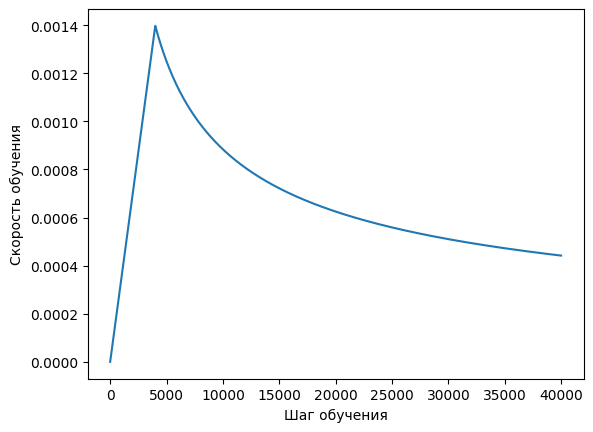

In [ ]:
plt.plot(learning_rate(tf.range(40000, dtype=tf.float32)))
plt.ylabel('Скорость обучения')
plt.xlabel('Шаг обучения')

### 2.6.1. Loss

Определим функцию потерь и точности. Мы используем функцию потерь перекрестной энтропии, используя `tf.keras.losses.SparseCategoricalCrossentropy`

In [ ]:
def masked_loss(label, pred):
  """
  Вычисляет маскированную разреженную категориальную потерю перекрестной энтропии между истинными метками и прогнозируемыми метками.

  Аргументы:
      label: Тензор размерности (batch_size, seq_length) содержащие истинные метки.
      pred: Тензор размерности (batch_size, seq_length, target_vocab_size) содержащий предсказанные метки.

  Выходы:
      Скалярный тензор, представляющий маскированное значение потерь.

  """
  mask = label != 0
  loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')
  loss = loss_object(label, pred)

  mask = tf.cast(mask, dtype=loss.dtype)
  loss *= mask

  loss = tf.reduce_sum(loss)/tf.reduce_sum(mask)
  return loss

Функция `masked_loss` вычисляет маскированную разреженную категориальную потерю перекрестной энтропии между предсказанными значениями и истинными метками. В этой функции входными данными `label` и `pred` являются истинные метки и предсказанные значения соответственно.

Сначала функция создает логическую маску, чтобы исключить дополненные значения (0) из расчета потерь. Затем он определяет объект потерь как `SparseCategoricalCrossentropy` из `tf.keras.losses`, который вычисляет потерю перекрестной энтропии между истинной и прогнозируемой метками.

На следующем шаге потери умножаются на маску, чтобы исключить любой вклад в потери от значений с дополнениями. Затем функция уменьшает потери, вычисляя сумму потерь по значениям без дополнений и деля ее на сумму по маске, чтобы получить среднее значение потерь по значениям без дополнений.

Теперь напишем функцию для вычисления `accuracy` (точности):

In [ ]:
def masked_accuracy(label, pred):
  """
  Вычисляет маскированную точность между истинными метками и прогнозируемыми метками.

  Аргументы:
      label: Тензор размерности (batch_size, seq_length) содержит истинные метки.
      pred:  Тензор размерности (batch_size, seq_length, target_vocab_size) содержит прогнозные метки.

  Выходы:
      Скалярный тензор, представляющий замаскированное значение accuracy.

  """
  pred = tf.argmax(pred, axis=2)
  label = tf.cast(label, pred.dtype)
  match = label == pred

  mask = label != 0

  match = match & mask

  match = tf.cast(match, dtype=tf.float32)
  mask = tf.cast(mask, dtype=tf.float32)
  return tf.reduce_sum(match)/tf.reduce_sum(mask)

Функция `masked_accuracy` вычисляет маскированную точность прогнозируемых значений с учетом истинных меток. Входными данными функции являются `label` и `pred`, которые являются истинными метками и прогнозируемыми значениями соответственно.

Сначала функция использует `tf.argmax`, чтобы найти индекс максимального значения в `pred` по последнему измерению, которое представляет предсказанный класс. Затем метка `truelabels` преобразуется в тот же тип данных, что и предсказанные значения pred.

Затем функция создает логическую маску, чтобы исключить из расчета значения с дополнениями. Функция использует оператор & для сравнения предсказанных и истинных меток и создания логического матричного соответствия. Значения в match указывают, совпадают ли предсказанные и истинные метки для значений без дополнений.

Затем матрица соответствия и матрица маски преобразуются в `float32` и используются для вычисления средней точности по значениям без заполнения. Функция возвращает сумму совпадений, деленную на сумму значений маски.

### 2.6.3. Обучение

Компилируем модель и проведем обучение методом `.fit` на протяжении 20 эпох. Используйте Colab A100 GPU!

In [ ]:
transformer.compile(
    loss=masked_loss,
    optimizer=optimizer,
    metrics=[masked_accuracy])

In [ ]:
transformer.fit(train_batches,
                epochs=1, # Здесь нужно изменить количество эпох на 20
                validation_data=val_batches)

118/810 ━━━━━━━━━━━━━━━━━━━━ 5:03:54 26s/step - loss: 8.7739 - masked_accuracy: 0.0217

## 2.7. Тестирование

После обучения модели попробуем использовать эту модель для перевода! Для этого напишем класс `Translator`.

`Translator` принимает `tokenizers` и `transformer` в качестве входных данных в своем конструкторе. В нем есть метод `__call__`, который берет предложение на португальском языке и переводит его на английский, используя модель `transformer`.

Входное предложение сначала преобразуется в токенизатор на португальском языке и преобразуется в тензор. Входным сигналом кодера является токенизированное предложение.

Для его инициализации в выходные данные добавляется английский токен `[START]`. Выходные данные сохраняются в `tf.TensorArray`.

Для каждого токена в выходных данных вызывается модель преобразования с входным сигналом кодера и текущим выходным сигналом. Выбирается последний токен из измерения `seq_len` прогнозов и добавляется к выходным данным. Если последним токеном является токен "[END]", цикл завершается. Выходные данные преобразуются в текст с использованием английского токенизатора и возвращаются вместе с весами внимания.

In [ ]:
class Translator(tf.Module):
  """Переводчик, использующий модель трансформер для перевода
предложений с португальского на английский.

  Аттрибуты:
      tokenizers (dict): Словарь токенизаторов для
португальского и английского языков.
      transformer (tf.keras.Model): Модель-трансформер, которая может
быть использована для преобразования последовательности в последовательность.
  """
  def __init__(self, tokenizers, transformer):
    self.tokenizers = tokenizers
    self.transformer = transformer

  def __call__(self, sentence, max_length=MAX_TOKENS):
    """Переводит предложение с португальского на английский.

    Аргументы:
        sentence (str): Предложение, подлежащее переводу.
        max_length (int): Максимальное количество лексем в выводимом предложении.

    Вызоды:
        tuple: Кортеж, содержащий переведенный текст, токены переведенного текста
и значения весов внимания в модели-трансформере.
    """
    # Входное предложение написано на португальском языке, поэтому добавлены символы `[START]` и `[END]`

    assert isinstance(sentence, tf.Tensor)
    if len(sentence.shape) == 0:
      sentence = sentence[tf.newaxis]

    sentence = self.tokenizers.pt.tokenize(sentence).to_tensor()

    encoder_input = sentence

    # Поскольку язык вывода - английский, инициализируйте вывод с помощью английского токена "[START]".
    start_end = self.tokenizers.en.tokenize([''])[0]
    start = start_end[0][tf.newaxis]
    end = start_end[1][tf.newaxis]

    # здесь требуется `tf.Sensor Array" (вместо списка Python), чтобы динамический цикл
    # можно было отследить с помощью `tf.function".
    output_array = tf.TensorArray(dtype=tf.int64, size=0, dynamic_size=True)
    output_array = output_array.write(0, start)

    for i in tf.range(max_length):
      output = tf.transpose(output_array.stack())
      predictions = self.transformer([encoder_input, output], training=False)

      # Выберите последний токен из измерения `seq_len`.
      predictions = predictions[:, -1:, :]  # размерность `(batch_size, 1, vocab_size)`.

      predicted_id = tf.argmax(predictions, axis=-1)

      # Соедините `predicted_id` с выходными данными, которые передаются
# decoder в качестве входных данных.
      output_array = output_array.write(i+1, predicted_id[0])

      if predicted_id == end:
        break

    output = tf.transpose(output_array.stack())
    # Выходная размерность `(1, tokens)`.
    text = tokenizers.en.detokenize(output)[0]  # размерность: `()`.

    tokens = tokenizers.en.lookup(output)[0]

    # `tf.function` не позволяет нам использовать значения attention_weights, которые были
    # рассчитаны на последней итерации цикла.
    # Поэтому пересчитаем их вне цикла.
    self.transformer([encoder_input, output[:,:-1]], training=False)
    attention_weights = self.transformer.decoder.last_attn_scores

    return text, tokens, attention_weights

Создадим экземпляр этого класса `Translator` и опробуем его несколько раз:

In [ ]:
translator = Translator(tokenizers, transformer)

Напишем функцию для перевода предложений для нас.

In [ ]:
def print_translation(sentence, tokens, ground_truth):
  """
  Функция print_translation принимает три аргумента: sentence, tokens
и ground_truth и выводит на печать входное предложение, прогнозируемый перевод
и перевод, основанный на истине.

  Аргументы:

    sentence: Строка, представляющая входное предложение.
    tokens: Тензор целых чисел, представляющий прогнозируемый перевод.
    ground_truth: Строка, представляющая основной перевод истины.

  Выходы:
    Эта функция ничего не возвращает, она просто выводит на печать введенное предложение,
прогнозируемый перевод и точный перевод в определенном формате.
  """
  print(f'{"Input:":15s}: {sentence}')
  print(f'{"Prediction":15s}: {tokens.numpy().decode("utf-8")}')
  print(f'{"Ground truth":15s}: {ground_truth}')

Также можно написать функцию, которая будет возвращать значения внимания. Давайте напишем.

In [ ]:
def plot_attention_head(in_tokens, translated_tokens, attention):
  """
  Выводит на график значения весов внимания для одной головы механизма внимания.

  Аргументы:
  - in_tokens: тензор размерности (in_seq_length,), содержащий входные токены.
  - translated_tokens: тензор размерности (out_seq_length,), содержащий переведенные токены.
  - attention: тензор размерности (out_seq_length, in_seq_length), содержащий веса внимания.

  Выходы:
  None.
  """
  # Модель не сгенерировала `<START>` в выходных данных. Пропустим это.
  translated_tokens = translated_tokens[1:]

  ax = plt.gca()
  ax.matshow(attention)
  ax.set_xticks(range(len(in_tokens)))
  ax.set_yticks(range(len(translated_tokens)))

  labels = [label.decode('utf-8') for label in in_tokens.numpy()]
  ax.set_xticklabels(
      labels, rotation=90)

  labels = [label.decode('utf-8') for label in translated_tokens.numpy()]
  ax.set_yticklabels(labels)

In [ ]:
 def plot_attention_weights(sentence, translated_tokens, attention_heads):
  """
  Строит график распределения внимания для каждой головы модели-трансформера.

  Аргументы:
      sentence (str): Вводное предложение на португальском языке.
      translated_tokens (tf.Tensor): Переведенные токены на английском языке.
      attention_heads (list): Головы внимания модели трансформер.

  Выходы:
      None
  """
  in_tokens = tf.convert_to_tensor([sentence])
  in_tokens = tokenizers.pt.tokenize(in_tokens).to_tensor()
  in_tokens = tokenizers.pt.lookup(in_tokens)[0]

  fig = plt.figure(figsize=(16, 8))

  for h, head in enumerate(attention_heads):
    ax = fig.add_subplot(2, 4, h+1)

    plot_attention_head(in_tokens, translated_tokens, head)

    ax.set_xlabel(f'Head {h+1}')

  plt.tight_layout()
  plt.show()


`plot_attention_weights` - это функция, которая отображает значения весов внимания для всех голов внимания в механизме `multi-head attention`. Она использует входное предложение, переведенные выходные лексемы и значения концентрации внимания и создает рисунок, где каждый подзаголовок представляет один раздел "внимание".

`plot_attention_head` - это вспомогательная функция, используемая `plot_attention_weights`. Он принимает входные токены, выходные токены и матрицу внимания отдельного пользователя и строит тепловую карту, где ось `x` представляет входные токены, а ось `y` - выходные токены. Он вызывается один раз для каждой головы внимания, чтобы создать подзаголовки на рисунке `plot_attention_weights`.

Составим несколько предложений для проверки.

In [ ]:
sentence = 'Eu amo programar em Python.'
ground_truth = 'I love programming in Python.'

translated_text, translated_tokens, attention_weights = translator(
    tf.constant(sentence))
print_translation(sentence, translated_text, ground_truth)

plot_attention_weights(sentence, translated_tokens, attention_weights[0])

In [ ]:
sentence = 'O tempo está ótimo para uma caminhada no parque.'
ground_truth = 'The weather is great for a walk in the park.'

translated_text, translated_tokens, attention_weights = translator(
    tf.constant(sentence))
print_translation(sentence, translated_text, ground_truth)

plot_attention_weights(sentence, translated_tokens, attention_weights[0])

plot_attention_weights(sentence, translated_tokens, attention_weights[0])

In [ ]:
sentence = 'Eu preciso comprar pão e leite na padaria.'
ground_truth = "I need to buy bread and milk at the bakery."

translated_text, translated_tokens, attention_weights = translator(
    tf.constant(sentence))
print_translation(sentence, translated_text, ground_truth)

plot_attention_weights(sentence, translated_tokens, attention_weights[0])

In [ ]:
sentence = 'A tecnologia tem transformado profundamente a forma como vivemos e trabalhamos.'
ground_truth = "Technology has profoundly transformed the way we live and work."

translated_text, translated_tokens, attention_weights = translator(
    tf.constant(sentence))
print_translation(sentence, translated_text, ground_truth)

plot_attention_weights(sentence, translated_tokens, attention_weights[0])

In [ ]:
sentence = 'A pandemia de COVID-19 teve um impacto devastador na economia global.'
ground_truth = "The COVID-19 pandemic has had a devastating impact on the global economy."

translated_text, translated_tokens, attention_weights = translator(
    tf.constant(sentence))
print_translation(sentence, translated_text, ground_truth)

plot_attention_weights(sentence, translated_tokens, attention_weights[0])

## 2.8. Export the model

Создадим класс под названием `ExportTranslator`, а затем добавим `translator` в `ExportTranslator`.


In [ ]:
class ExportTranslator(tf.Module):
  """
  A class for exporting a trained Translator model as a `tf.Module` for inference.

  Args:
  translator (Translator): A trained instance of the Translator class.

  Methods:
  __call__(self, sentence):
      Translates the input sentence to the target language and returns the translation.
  """
  def __init__(self, translator):
    self.translator = translator

  @tf.function(input_signature=[tf.TensorSpec(shape=[], dtype=tf.string)])
  def __call__(self, sentence):
    """
    Translates the input sentence to the target language and returns the translation.

    Args:
    sentence (tf.string): The input sentence to translate.

    Returns:
    A string tensor representing the translated sentence.

    """
    (result,
     tokens,
     attention_weights) = self.translator(sentence, max_length=MAX_TOKENS)

    return result

Класс `ExportTranslator` принимает объект `translator` в качестве входных данных и экспортирует его как модуль `TensorFlow`. У него есть метод `__call__`, который принимает предложение с одним строковым аргументом и возвращает результат перевода объекта `translator` для этого входного предложения.

Метод `__call__` оформлен с помощью `tf.function` и `input_signature`, которые определяют тип данных и форму входного тензора. Тензор предложения имеет пустую форму и строковый тип данных. Метод `__call__` вызывает объект `translator` с входным предложением и аргументом `max_length`, равным `MAX_TOKENS`, и возвращает результат перевода в виде тензора.

In [ ]:
translator = ExportTranslator(translator)

Поскольку модель расшифровывает прогнозы с использованием `tf.argmax`, прогнозы являются детерминированными. Исходная модель и модель, загруженная повторно из `SavedModel`, должны давать идентичные прогнозы.

In [ ]:
translator('Eu amo programar em Python.').numpy()

Теперь мы можем использовать метод `.save` для сохранения модели!

In [ ]:
tf.saved_model.save(translator, export_dir='translator')

Мы можем перезагрузить модель и протестировать прогноз!

In [ ]:
reloaded_translator = tf.saved_model.load('translator')

In [ ]:
reloaded_translator('Eu amo programar em Python.').numpy()

## 2.9. Эксперименты с моделью

Проведите обучение модели с 50 эпохами и сравните результаты!


In [ ]:
transformer.fit(train_batches,
                epochs=50,
                validation_data=val_batches)

In [ ]:
translator = Translator(tokenizers, transformer)

In [ ]:
sentence = 'Eu amo programar em Python.'
ground_truth = 'I love programming in Python.'

translated_text, translated_tokens, attention_weights = translator(
    tf.constant(sentence))
print_translation(sentence, translated_text, ground_truth)

plot_attention_weights(sentence, translated_tokens, attention_weights[0])

In [ ]:
sentence = 'O tempo está ótimo para uma caminhada no parque.'
ground_truth = 'The weather is great for a walk in the park.'

translated_text, translated_tokens, attention_weights = translator(
    tf.constant(sentence))
print_translation(sentence, translated_text, ground_truth)

plot_attention_weights(sentence, translated_tokens, attention_weights[0])

plot_attention_weights(sentence, translated_tokens, attention_weights[0])

In [ ]:
sentence = 'Eu preciso comprar pão e leite na padaria.'
ground_truth = "I need to buy bread and milk at the bakery."

translated_text, translated_tokens, attention_weights = translator(
    tf.constant(sentence))
print_translation(sentence, translated_text, ground_truth)

plot_attention_weights(sentence, translated_tokens, attention_weights[0])

In [ ]:
sentence = 'A tecnologia tem transformado profundamente a forma como vivemos e trabalhamos.'
ground_truth = "Technology has profoundly transformed the way we live and work."

translated_text, translated_tokens, attention_weights = translator(
    tf.constant(sentence))
print_translation(sentence, translated_text, ground_truth)

plot_attention_weights(sentence, translated_tokens, attention_weights[0])

In [ ]:
sentence = 'A pandemia de COVID-19 teve um impacto devastador na economia global.'
ground_truth = "The COVID-19 pandemic has had a devastating impact on the global economy."

translated_text, translated_tokens, attention_weights = translator(
    tf.constant(sentence))
print_translation(sentence, translated_text, ground_truth)

plot_attention_weights(sentence, translated_tokens, attention_weights[0])

Можем экспортировать модель

In [ ]:
translator = ExportTranslator(translator)
tf.saved_model.save(translator, export_dir='translater_pt_en')

Похоже, у нас перевод немного улучшился!

## References

[1] Vaswani, Ashish, et al. "Attention is all you need." Advances in neural information processing systems 30 (2017).

[2] [https://python.plainenglish.io/image-captioning-with-an-end-to-end-transformer-network-8f39e1438cd4](https://python.plainenglish.io/image-captioning-with-an-end-to-end-transformer-network-8f39e1438cd4)

[3] [https://www.tensorflow.org/text/tutorials/transformer](https://www.tensorflow.org/text/tutorials/transformer)


